# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aditiya Ramadhan Saputra
- **Email:** aditiyaramadhansaputra08@gmail.com
- **ID Dicoding:** aditiyaramadhans

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca, suhu, dan kelembaban terhadap jumlah pengguna sepeda terdaftar dan tidak terdaftar?
- Bagaimana pengaruh hari libur terhadap total jumlah pemakaian sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install streamlit pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
from google.colab import files

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
day_df = pd.read_csv('/content/drive/MyDrive/Dataset/pengguna sepeda/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv('/content/drive/MyDrive/Dataset/pengguna sepeda/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Memuat tabel day.csv dan menampilkan 5 baris pertama dari dataframe day_df
- Memuat tabel hour.csv dan menampilan 5 baris pertama dari dataframe hour_df

### Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada dataframe day_df dapat dilihat bahwa tipe data dari dteday merupakan object yang seharusnya datetime
- Dapat dilihat juga bahwa dataframe tersebut tidak memiliki missing value
- Pada dataframe tersebut juga tidak ditemukan duplikasi data


### Cleaning Data

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Mengubah tipe data object pada dataframe day_df menjadi tipe data datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
287,288,2011-10-15,4,0,10,0,6,0,1,0.506667,0.498725,0.483333,0.258083,1899,3318,5217
491,492,2012-05-06,2,1,5,0,0,0,2,0.562500,0.546737,0.740000,0.149879,2135,4224,6359
535,536,2012-06-19,2,1,6,0,2,1,1,0.688333,0.654692,0.690000,0.148017,968,5857,6825
108,109,2011-04-19,2,0,4,0,2,1,2,0.505833,0.489258,0.665833,0.157971,409,2795,3204
699,700,2012-11-30,4,1,11,0,5,1,1,0.298333,0.323867,0.649583,0.058471,362,5306,5668


Melihat rangkuman parameter statistik dari data

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [ ]:
weather_data = day_df.groupby(['weathersit', 'temp', 'hum']).agg({
    'casual': ['mean', 'sum', 'max'],
    'registered': ['mean', 'sum', 'max']
}).reset_index()

print(weather_data)

    weathersit      temp       hum  casual             registered            
                                      mean   sum   max       mean   sum   max
0            1  0.059130  0.400000    93.0    93    93      888.0   888   888
1            1  0.096522  0.436522   150.0   150   150      836.0   836   836
2            1  0.097391  0.491739    86.0    86    86     1330.0  1330  1330
3            1  0.127500  0.464583    73.0    73    73     1456.0  1456  1456
4            1  0.138333  0.434167    54.0    54    54      768.0   768   768
..         ...       ...       ...     ...   ...   ...        ...   ...   ...
726          3  0.543333  0.906250   217.0   217   217     2199.0  2199  2199
727          3  0.590833  0.871667   315.0   315   315     4324.0  4324  4324
728          3  0.595833  0.865417  1264.0  1264  1264     3195.0  3195  3195
729          3  0.599167  0.917083   118.0   118   118     1878.0  1878  1878
730          3  0.633913  0.939565   153.0   153   153     1689.

In [ ]:
day_data = day_df.groupby(['holiday', 'workingday']).agg({
    'cnt': ['mean', 'sum', 'max'],
}).reset_index()

print(day_data)

  holiday workingday          cnt               
                             mean      sum   max
0       0          0  4389.685714   921834  8714
1       0          1  4584.820000  2292410  8362
2       1          0  3735.000000    78435  7403


In [ ]:
weather_data.columns = ['_'.join(col).strip() for col in weather_data.columns.values]
weather_data.to_csv('weather_data.csv', index=False)
files.download('weather_data.csv')

day_data.columns = ['_'.join(col).strip() for col in day_data.columns.values]
day_data.to_csv('day_data.csv', index=False)
files.download('day_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Insight:**
- data dikelompokkan berdasarkan weathersit (cuaca), temp(suhu), hum (kelembapan), weekday, dan workingday yang disimpan ke dalam variabel avg_data yang kemudian data tersebut digunakan untuk menghitung rata-rata dan total jumlah pengguna sepeda (cnt)
- data tersebut disimpan ke file csv dengan nama all_data.csv yang kemudian di download untuk ditampilkan di dashboard

## Visualization & Explanatory Analysis

### Pertanyaan 1:


**pengaruh cuaca (weathersit) terhadap pengguna sepeda casual dan registered**

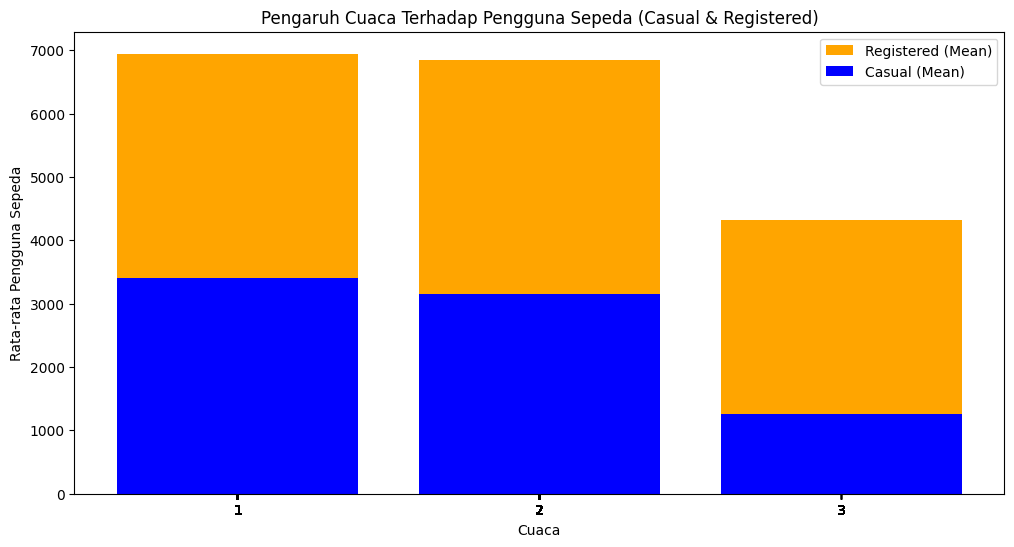

In [ ]:
import numpy as np

plt.figure(figsize=(12, 6))
# casual
plt.bar(weather_data['weathersit'], weather_data[('registered', 'mean')], color='orange', label='Registered (Mean)')
plt.bar(weather_data['weathersit'], weather_data[('casual', 'mean')],color='blue', label='Casual (Mean)')
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata Pengguna Sepeda')
plt.title('Pengaruh Cuaca Terhadap Pengguna Sepeda (Casual & Registered)')
plt.xticks(weather_data['weathersit'])
plt.legend()
plt.show()

1 = Cuaca cerah atau sebagian berawan (Clear, Few clouds, Partly cloudy)

2 = Kabut dengan awan sedang hingga tebal (Mist + Cloudy, Mist + Broken clouds)

3 = Hujan ringan, salju ringan, atau badai petir dengan awan tersebar (Light Snow, Light Rain + Thunderstorm + Scattered clouds).

**Pengaruh suhu(temp) terhadap pengguna sepeda casual & registered**

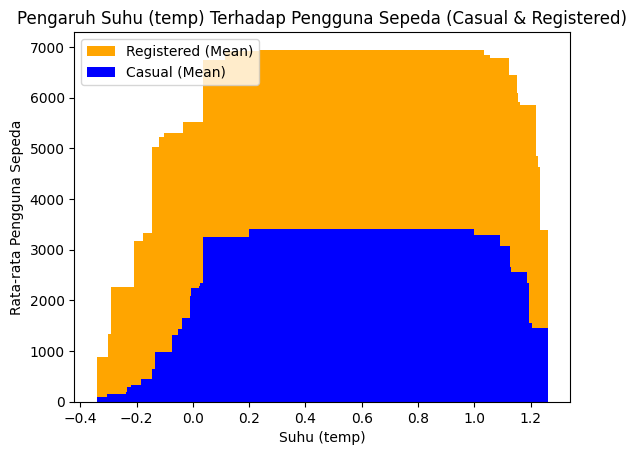

In [ ]:
plt.figure()
plt.bar(weather_data['temp'],weather_data[('registered', 'mean')],color='orange', label='Registered (Mean)')
plt.bar(weather_data['temp'], weather_data[('casual', 'mean')],color='blue', label='Casual (Mean)')
plt.xlabel('Suhu (temp)')
plt.ylabel('Rata-rata Pengguna Sepeda')
plt.title('Pengaruh Suhu (temp) Terhadap Pengguna Sepeda (Casual & Registered)')
plt.legend()
plt.show()

pengaruh kelembapan (hum) terhadap pengguna sepeda casual & registered

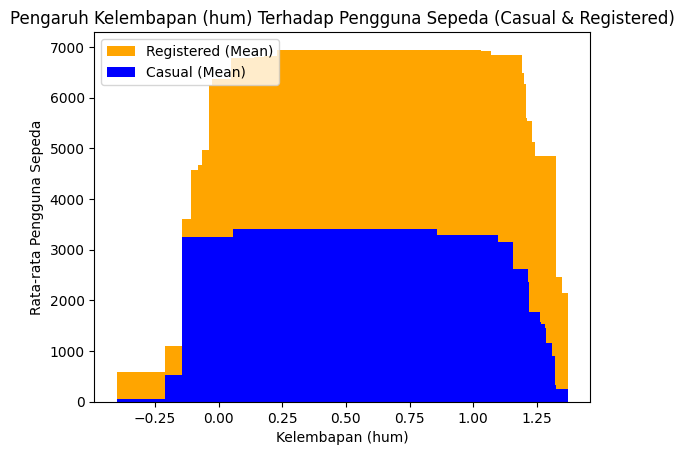

In [ ]:
plt.figure()
plt.bar(weather_data['hum'],weather_data[('registered', 'mean')],color='orange', label='Registered (Mean)')
plt.bar(weather_data['hum'], weather_data[('casual', 'mean')] ,color='blue', label='Casual (Mean)')
plt.xlabel('Kelembapan (hum)')
plt.ylabel('Rata-rata Pengguna Sepeda')
plt.title('Pengaruh Kelembapan (hum) Terhadap Pengguna Sepeda (Casual & Registered)')
plt.legend()
plt.show()

### Pertanyaan 2:

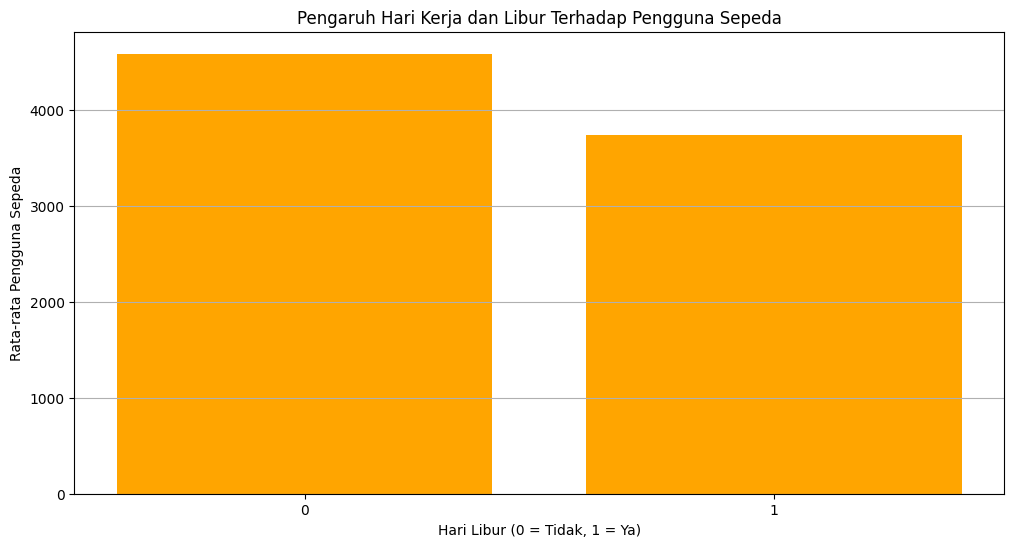

In [ ]:
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(day_data['holiday'].astype(str), day_data[('cnt', 'mean')], color='orange')
plt.xlabel('Hari Libur (0 = Tidak, 1 = Ya)')
plt.ylabel('Rata-rata Pengguna Sepeda')
plt.title('Pengaruh Hari Kerja dan Libur Terhadap Pengguna Sepeda')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

**Insight:**
- memvisualisasikan hasil group berdasarkan cuaca dan juga berdasarkan working day

## Conclusion

- Berdasarkan analisis yang dilakukan untuk pertanyaan pertama dapat dilihat bahwa cuaca, suhu, dan kelembapan mempengaruhi rata-rata pengguna sepeda semakin baik cuacanya (weathersit) 1 pengguna semakin banyak begitu pula dengan kelembapan 0 (kering) - 1 (sangat lembap) dan juga suhu 0(dingin) - 1(panas)
- Berdasarkan analisis yang dilakukan untuk pertayaan kedua maka dapat disimpulkan bahwa hari libur mempengaruhi penggunaan sepeda dengan rata-rata pengguna sepeda pada hari libur yaitu 4584,82 yang lebih besar dari pengguna pada hari kerja yaitu sebesar 3735